In [3]:
#install scikit-learn
!pip install scikit-learn


In [71]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [73]:
df=pd.read_csv("blood_clot_data.csv")
df

,Age,D_dimer,Platelet_Count,Blood_Pressure,Cholesterol,Smoking,Diabetes,Clot_Present
0,69,228.155578,218113.000787,109.496820,238.778288,0,0,0
1,32,278.655285,223450.152250,126.628519,217.087774,1,0,0
2,89,331.090757,218842.973679,112.448305,174.150908,0,0,0
3,78,447.535622,222226.144042,102.970293,271.012436,1,1,1
4,38,385.765962,218130.643635,138.121941,152.254527,0,1,0
...,...,...,...,...,...,...,...,...
495,34,338.240975,309532.313739,131.392674,178.958606,1,0,0
496,88,316.645221,297477.706772,132.397846,113.866283,0,0,0
497,62,349.245126,175755.101578,114.584873,243.886108,0,0,0
498,21,328.916864,122303.943255,148.985618,180.846502,1,0,1


In [75]:
#display the first 10 rows
df.head(10)

,Age,D_dimer,Platelet_Count,Blood_Pressure,Cholesterol,Smoking,Diabetes,Clot_Present
0,69,228.155578,218113.000787,109.496820,238.778288,0,0,0
1,32,278.655285,223450.152250,126.628519,217.087774,1,0,0
2,89,331.090757,218842.973679,112.448305,174.150908,0,0,0
3,78,447.535622,222226.144042,102.970293,271.012436,1,1,1
4,38,385.765962,218130.643635,138.121941,152.254527,0,1,0
5,41,284.006147,309450.826555,141.387327,236.766167,0,0,0
6,20,298.098379,321025.212399,121.352344,240.023293,0,1,0
7,39,199.747064,221462.685313,91.134366,173.175192,1,0,0
8,70,298.148686,208382.221345,121.806333,255.698612,1,1,0
9,19,271.134136,273570.777819,135.877060,189.998139,0,0,0


In [77]:
#display the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             500 non-null    int64  
 1   D_dimer         500 non-null    float64
 2   Platelet_Count  500 non-null    float64
 3   Blood_Pressure  500 non-null    float64
 4   Cholesterol     500 non-null    float64
 5   Smoking         500 non-null    int64  
 6   Diabetes        500 non-null    int64  
 7   Clot_Present    500 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [79]:
#look for any null values
df.any().isnull()

Age               False
D_dimer           False
Platelet_Count    False
Blood_Pressure    False
Cholesterol       False
Smoking           False
Diabetes          False
Clot_Present      False
dtype: bool

In [81]:
#display the descriptive statistics
df.describe()

,Age,D_dimer,Platelet_Count,Blood_Pressure,Cholesterol,Smoking,Diabetes,Clot_Present
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,52.930000,300.011222,254931.431765,130.812426,200.811921,0.280000,0.212000,0.1000
std,21.009519,99.759627,49522.416610,14.924935,39.314721,0.449449,0.409134,0.3003
min,18.000000,30.311336,105187.231090,86.179743,79.219514,0.000000,0.000000,0.0000
25%,34.000000,229.653176,221457.276612,120.820958,175.336626,0.000000,0.000000,0.0000
50%,52.000000,298.123533,255635.170822,130.341483,200.264442,0.000000,0.000000,0.0000
75%,71.000000,364.028833,285683.010205,140.797155,226.767056,1.000000,0.000000,0.0000
max,89.000000,607.888081,378985.466883,177.896614,325.509941,1.000000,1.000000,1.0000


In [83]:
df['Clot_Present'].value_counts()#check for balance

Clot_Present
0    450
1     50
Name: count, dtype: int64

In [85]:
# Features and target
X = df.drop('Clot_Present', axis=1)
y = df['Clot_Present']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)#split data

In [137]:
#train the model


smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [139]:
#make predictions
y_pred=model.predict(X_test)


In [141]:
#evaluate model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

[[113  19]
 [  7  11]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       132
           1       0.37      0.61      0.46        18

    accuracy                           0.83       150
   macro avg       0.65      0.73      0.68       150
weighted avg       0.87      0.83      0.84       150

Accuracy: 0.8266666666666667


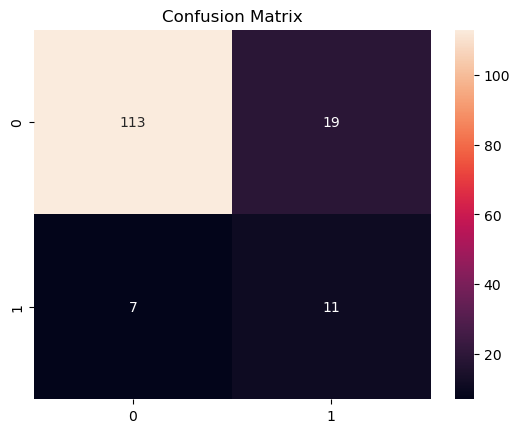

In [143]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

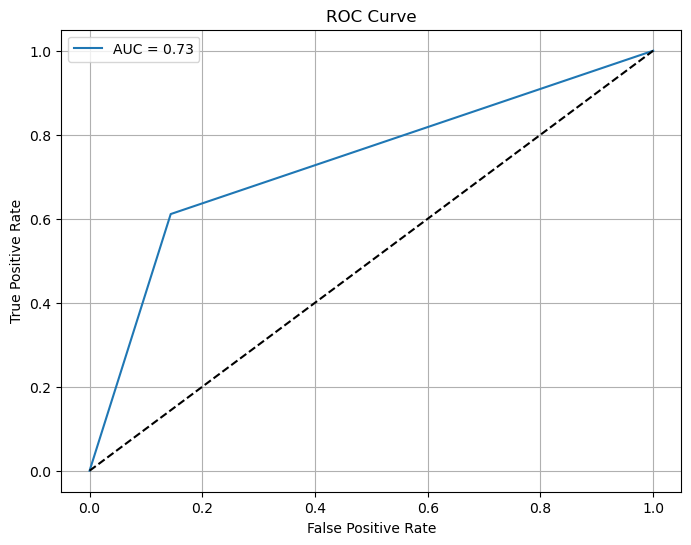

In [144]:

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


We want to make our model more accurate so lets try and use XGBOOST 

In [149]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.1/150.0 MB 544.7 kB/s eta 0:04:36
   ---------------------------------------- 0.1/150.0 MB 726.2 kB/s eta 0:03:27
   ---------------------------------------- 0.1/150.0 MB 599.1 kB/s eta 0:04:11
   ---------------------------------------- 0.3/150.0 MB 1.0 MB/s eta 0:02:27
   ---------------------------------------- 0.4/150.0 MB 1.1 MB/s eta 0:02:15
   ---------------------------------------- 0.6/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.6/150.0 MB 1.7 MB/s eta 0:01:30
   ---------------------------------------- 1.0/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 1.3/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.6/150.0 MB 3.0 MB/s eta 0:00:50
    --------------------------------------- 2.2/150.0 MB 3.7 MB/s

In [202]:
#import and train the model
from xgboost import XGBClassifier

xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # we will use inbalanced data because the SMOTE-balance data has high False Positive abd False negative


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [178]:
#evaluating our model
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [180]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


[[132   0]
 [  8  10]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       132
           1       1.00      0.56      0.71        18

    accuracy                           0.95       150
   macro avg       0.97      0.78      0.84       150
weighted avg       0.95      0.95      0.94       150

Accuracy: 0.9466666666666667


In [196]:
y_pred_thresh = (y_prob_xgb > 0.4).astype(int)
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[130   2]
 [  7  11]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       132
           1       0.85      0.61      0.71        18

    accuracy                           0.94       150
   macro avg       0.90      0.80      0.84       150
weighted avg       0.94      0.94      0.94       150



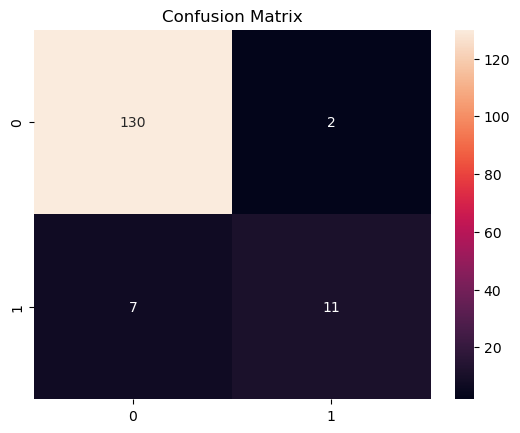

In [198]:
sns.heatmap(confusion_matrix(y_test, y_pred_thresh), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


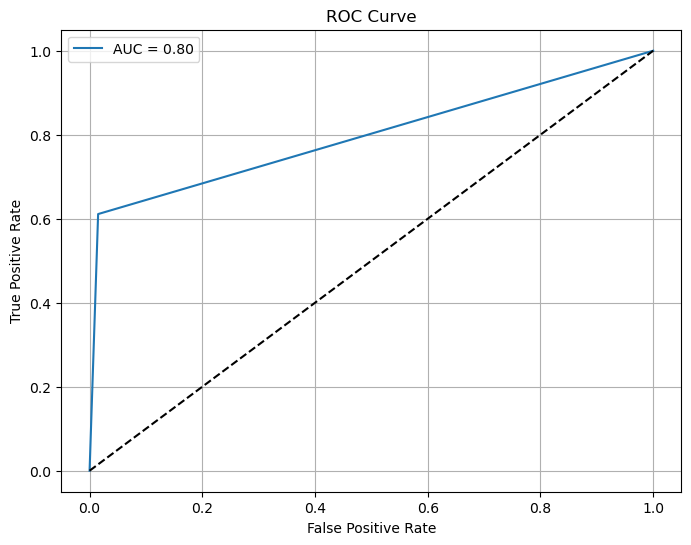

In [200]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_thresh)
auc = roc_auc_score(y_test, y_pred_thresh)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()